<a href="https://colab.research.google.com/github/AnnLivio/Automatidata/blob/main/Automatidata_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the Automatidata project
La comisión de Taxi y Limusina de New York busca una manera de utilizar los datos recolectados en el área de la ciudad para predecir el monto de la tarifa de los viajes en taxi.
Esta es una etapa inicial del proyecto. Para obtener información clara, se deben analizar los datos de la Comisión, identificar las variables clave y asegurarse de que el conjunto de datos esté listo para el análisis.

*The New York City Taxi and Limousine Commission seeks a way to utilize the data collected from the New York City area to predict the fare amount for taxi cab rides. This is an early stages of the project. To get clear insights, New York TLC's data must be analyzed, key variables identified, and the dataset ensured it is ready for analysis.*


### Data Dictionary

|Column name |Description |
|---|---|
| ID | Trip identification number |
| VendorID | A code indicating the TPEP provider that provided the record. </br>1= Creative Mobile Technologies, LLC; </br>2= VeriFone Inc.|
| tpep_pickup_datetime |The date and time when the meter was engaged. |
|tpep_dropoff_datetime | The date and time when the meter was disengaged. |
|Passenger_count |The number of passengers in the vehicle. </br> This is a driver-entered value.|
|Trip_distance |The elapsed trip distance in miles reported by the taximeter.|
|PULocationID |TLC Taxi Zone in which the taximeter was engaged|
|DOLocationID |TLC Taxi Zone in which the taximeter was disengaged|
|RateCodeID |The final rate code in effect at the end of the trip.<br><br>1 = Standard rate <br> 2 = JFK <br>3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride|
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before being sent to the vendor, aka “store and forward,”  because the vehicle did not have a connection to the server. <br><br>Y = store and forward trip <br>N = not a store and forward trip|
|Payment_type | A numeric code signifying how the passenger paid for the trip.<br><br>1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip|
|Fare_amount |The time-and-distance fare calculated by the meter.|
|Extra | Miscellaneous extras and surcharges. Currently, this only includes the 0.50 and 1 rush hour and overnight charges.|
|MTA_tax| 0.50 MTA tax that is automatically triggered based on the metered rate in use.|
|Improvement_surcharge |0.30 improvement surcharge assessed trips at the flag drop. The  improvement surcharge began being levied in 2015.|
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.|
|Tolls_amount |Total amount of all tolls paid in trip. |
|Total_amount |The total amount charged to passengers. Does not include cash tips.|

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Automatidata/2017_Yellow_Taxi_Trip_Data.csv")


In [3]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to


### **Primeras Observaciones**

+ Debemos cambiar el timpo de datos en `tpep_pickup_datetime`, `tpep_dropoff_Datetime` de object a date.
+ No hay valores null.
+ Se puede eliminar la columna `Unnamed: 0`

In [5]:
# Correct data type
data["tpep_pickup_datetime"] = pd.to_datetime(data["tpep_pickup_datetime"])
data["tpep_dropoff_datetime"] = pd.to_datetime(data["tpep_dropoff_datetime"])

In [6]:
# Drop column Unnamed: 0
data.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [7]:
data.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295



### **Observaciones 2**

+ Se observan valores negativos en `fare_amount`, `extra` and `mta_tax` que deberían observarse en detalle.
* Se presentan valores atípicos en `trip_distance`, `fare_amount`y `tip_amount`.
+ `RatecodeID` presenta un valor máximo de 99 cuando debería ser 6.


In [8]:
data.RatecodeID.value_counts()

,count
RatecodeID,
1,22070
2,513
5,68
3,39
4,8
99,1


In [9]:
# Drop the record
data.drop(data.query("RatecodeID > 6").index, inplace=True)

## **Step 2:** Observación de variables

Ordenar e interpretar los datos por las variables `trip_distance` and `total_amount`.

In [10]:
# Select the necessary columns
col = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra',
       'tip_amount', 'tolls_amount', 'total_amount']

In [11]:
data[col].sort_values("trip_distance", ascending=False).head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
9280,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,2,150.00,0.0,0.00,0.00,150.30
13861,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,1,200.01,0.0,51.64,5.76,258.21
6064,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,1,107.00,0.0,55.50,16.26,179.06
10291,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,2,131.00,0.0,0.00,0.00,131.80
29,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,1,80.00,0.5,18.56,11.52,111.38
18130,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,1,90.50,0.0,19.85,8.16,119.31
5792,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,1,52.00,0.0,14.64,5.76,73.20
15350,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,2,1,52.00,0.0,4.40,5.76,62.96
10302,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,2,1,52.00,0.0,11.71,5.76,70.27
2592,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,2,2,52.00,4.5,0.00,5.76,63.06


In [12]:
data[col].sort_values("total_amount", ascending=False).head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
8476,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,1,999.99,0.0,200.00,0.00,1200.29
20312,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,2,450.00,0.0,0.00,0.00,450.30
13861,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,1,200.01,0.0,51.64,5.76,258.21
12511,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,1,175.00,0.0,46.69,11.75,233.74
15474,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,1,200.00,0.0,11.00,0.00,211.80
6064,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,1,107.00,0.0,55.50,16.26,179.06
16379,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,2,140.00,0.0,0.00,16.26,157.06
3582,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,1,152.00,0.0,0.00,0.00,152.30
11269,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,5,1,120.00,0.0,20.00,11.52,151.82
9280,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,2,150.00,0.0,0.00,0.00,150.30



**Observaciones**
Encontramos valores inusuales en ambas consultas. Las filas con máximos valores en `trip_distance` no se corresponden con los valores máximos en `total_amount`.

In [13]:
# Count Payment types
data.payment_type.value_counts()

,count
payment_type,
1,15264
2,7267
3,121
4,46


1 = Credit card / 2 = Cash / 3 = No charge / 4 = Dispute / 5 = Unknown / 6 = Voided trip

Una amplia mayoría de viajes se pagan con `Credit Card` y en segundo lugar en `Cash`.

### Promedio de tips con Credit Card

In [14]:
# The average tip for trips paid for with credit
print("AVG tip for Credit card", data.query("payment_type == 1")["tip_amount"].mean())

# The average tip for trips paid for with cash
print("AVG tip for Cash", data.query("payment_type == 2").tip_amount.mean())

AVG tip for Credit card 2.729979035639413
AVG tip for Cash 0.0


### Cantidad de viajes por VendorID y el promedio del total de viaje

In [15]:
# How many times is each vendor ID represented in the data?
# What is the mean total amount for each vendor?

data.groupby("VendorID").agg({"VendorID":'count', "total_amount": 'mean'})


,VendorID,total_amount
VendorID,,
1,10072,16.291993
2,12626,16.320382


### Filtramos los datos por pagos con Credit Card

In [17]:
# Filter the data for credit card payments only
data_cc = data.query("payment_type == 1")

# Filter the credit-card-only data for passenger count only
data_cc.passenger_count.value_counts()


,count
passenger_count,
1,10977
2,2168
5,775
3,600
6,451
4,267
0,26


### Calculamos el promedio de tips por passenger_count

In [32]:
# Calculate the average tip amount for each passenger count (credit card payments only)
data_cc.groupby("passenger_count").tip_amount.mean(numeric_only=True)

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


## EDA - Análisis Exploratorio


In [18]:
data[col].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount
count,22698,22698,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000,22698.000000
mean,2017-06-29 07:37:21.415234816,2017-06-29 07:54:22.286809344,1.642391,2.913441,1.039078,1.336902,13.023802,0.333289,1.835862,0.312555,16.307784
min,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,-120.000000,-1.000000,0.000000,0.000000,-120.300000
25%,2017-03-30 03:07:14.750000128,2017-03-30 03:09:46.750000128,1.000000,0.990000,1.000000,1.000000,6.500000,0.000000,0.000000,0.000000,8.750000
50%,2017-06-23 12:51:06,2017-06-23 13:04:29,1.000000,1.610000,1.000000,1.000000,9.500000,0.000000,1.350000,0.000000,11.800000
75%,2017-10-02 10:43:06,2017-10-02 11:07:42.500000,2.000000,3.060000,1.000000,2.000000,14.500000,0.500000,2.450000,0.000000,17.800000
max,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,4.000000,999.990000,4.500000,200.000000,19.100000,1200.290000
std,NaN,NaN,1.285213,3.653200,0.281169,0.496217,13.237230,0.463101,2.800661,1.399241,16.092441


In [19]:
# Count negative total_amount by payment_type
data.query("total_amount < 0").payment_type.value_counts()


,count
payment_type,
3,7
4,7


### trip_distance

<Axes: xlabel='trip_distance'>

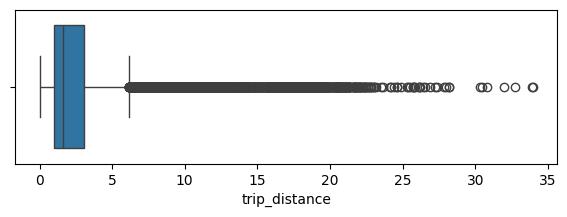

In [20]:
# Create box plot of trip_distance
plt.figure(figsize=(7,2))
sns.boxplot(data, x="trip_distance")

<Axes: xlabel='trip_distance', ylabel='Count'>

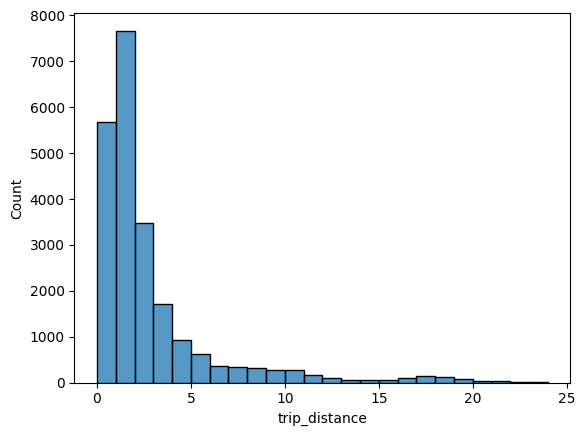

In [21]:
# Create histogram of trip_distance
sns.histplot(data, x="trip_distance", bins=range(0,25,1))

### total_amount

<Axes: xlabel='total_amount'>

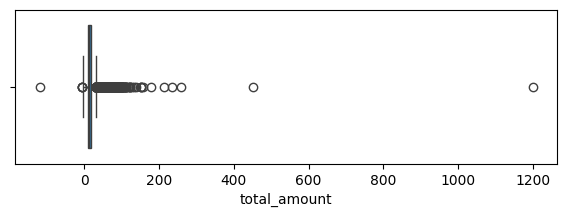

In [22]:
# Create box plot of total_amount
plt.figure(figsize=(7,2))
sns.boxplot(data, x="total_amount")

<Axes: xlabel='total_amount', ylabel='Count'>

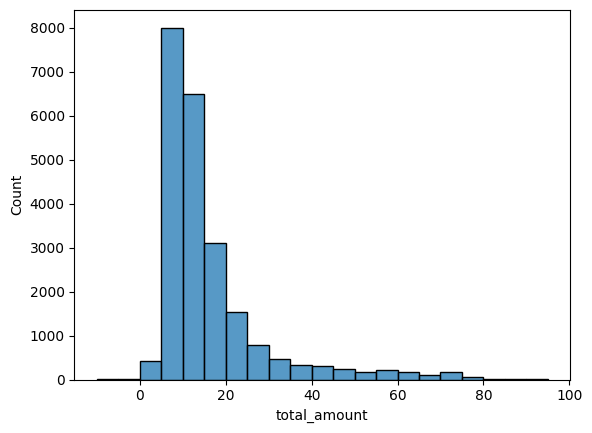

In [23]:
# Create histogram of total_amount
sns.histplot(data, x="total_amount", bins=range(-10,100,5))

### tip_amount

<Axes: xlabel='tip_amount'>

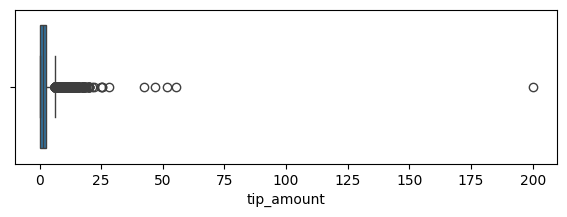

In [24]:
# Create box plot of tip_amount
plt.figure(figsize=(7,2))
sns.boxplot(data, x="tip_amount")

<Axes: xlabel='tip_amount', ylabel='Count'>

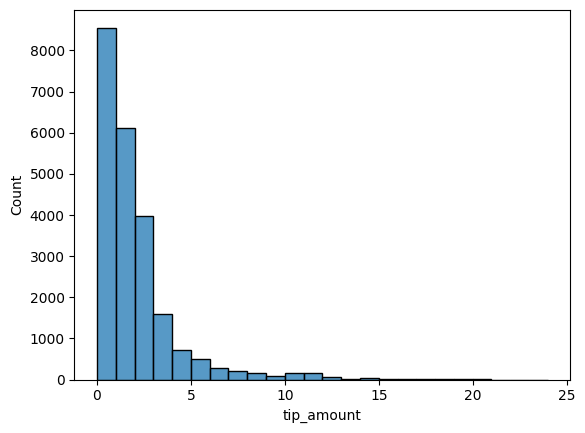

In [25]:
# Create histogram of tip_amount
sns.histplot(data, x="tip_amount", bins=range(0,25,1))

### tip_amount by VendorID

Text(0.5, 1.0, 'Tip amount by VendorID')

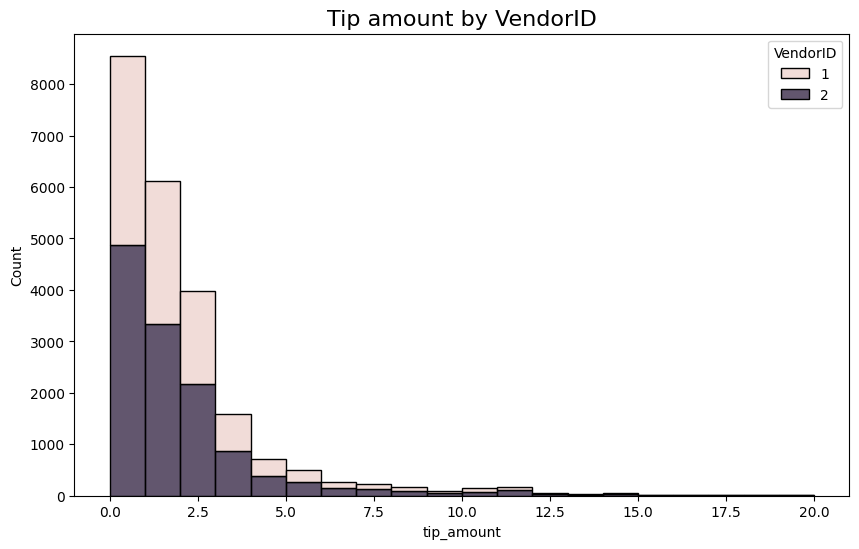

In [26]:
# Create histogram of tip_amount by vendor

plt.figure(figsize=(10,6))
sns.histplot(data, x='tip_amount',
             hue='VendorID',
             multiple='stack',
             bins=range(0,21,1))
plt.title('Tip amount by VendorID',  fontsize=16)

Text(0.5, 1.0, 'Tip amount by VendorID over $10')

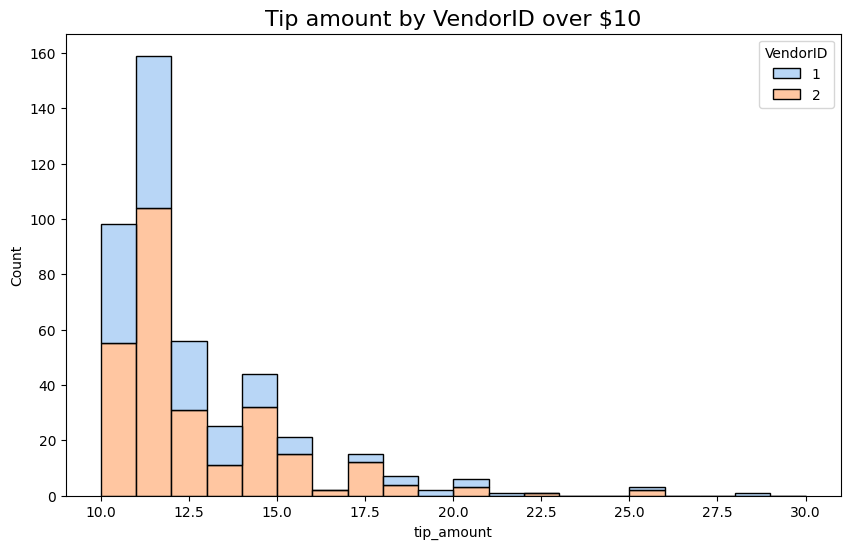

In [27]:
# Create histogram of tip_amount by vendor for tips > $10
tip_over10 = data.query("tip_amount > 10")
plt.figure(figsize=(10,6))
sns.histplot(data= tip_over10, x='tip_amount',
             hue='VendorID',
             multiple='stack',
             palette='pastel',
             bins=range(10,31,1))
plt.title('Tip amount by VendorID over $10', fontsize=16)

### Mean tips by passenger_count

In [28]:
mean_tips = data.groupby('passenger_count')['tip_amount'].mean().reset_index()
mean_tips

,passenger_count,tip_amount
0,0,2.202500
1,1,1.848920
2,2,1.856378
3,3,1.716768
4,4,1.530264
5,5,1.873185
6,6,1.720260


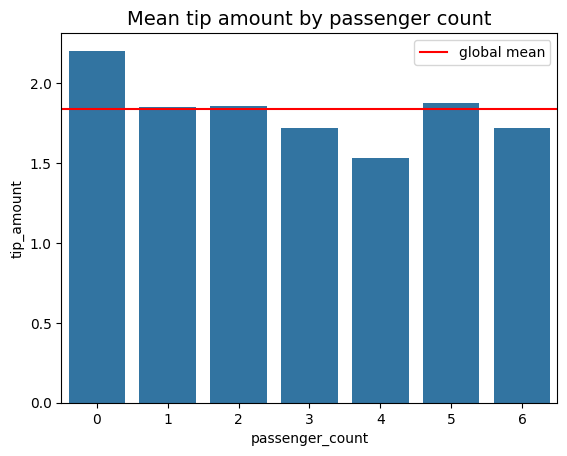

In [29]:
# Create bar plot for mean tips by passenger count
ax = sns.barplot(x='passenger_count', y='tip_amount', data = mean_tips)
ax.axhline(data['tip_amount'].mean(), color='red', label='global mean')
ax.legend()

plt.title('Mean tip amount by passenger count', fontsize=14);

### Create Month and Day column

In [30]:
data['month'] = data['tpep_pickup_datetime'].dt.month_name()
data['day'] = data['tpep_pickup_datetime'].dt.day_name()
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


### **Plot total ride count by month**

In [31]:
# Get total rides by month
rides_by_month = data['month'].value_counts()
rides_by_month

,count
month,
March,2049
October,2027
April,2018
May,2013
January,1997
June,1964
December,1863
November,1843
February,1769


In [32]:
# Reorder the monthly ride list so months go in order
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
rides_by_month = rides_by_month.reindex(month_list).reset_index()
rides_by_month

,month,count
0,January,1997
1,February,1769
2,March,2049
3,April,2018
4,May,2013
5,June,1964
6,July,1697
7,August,1724
8,September,1734
9,October,2027


<ipython-input-33-8ae6a9aceb46>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_list)


Text(0.5, 1.0, 'Total rides by month')

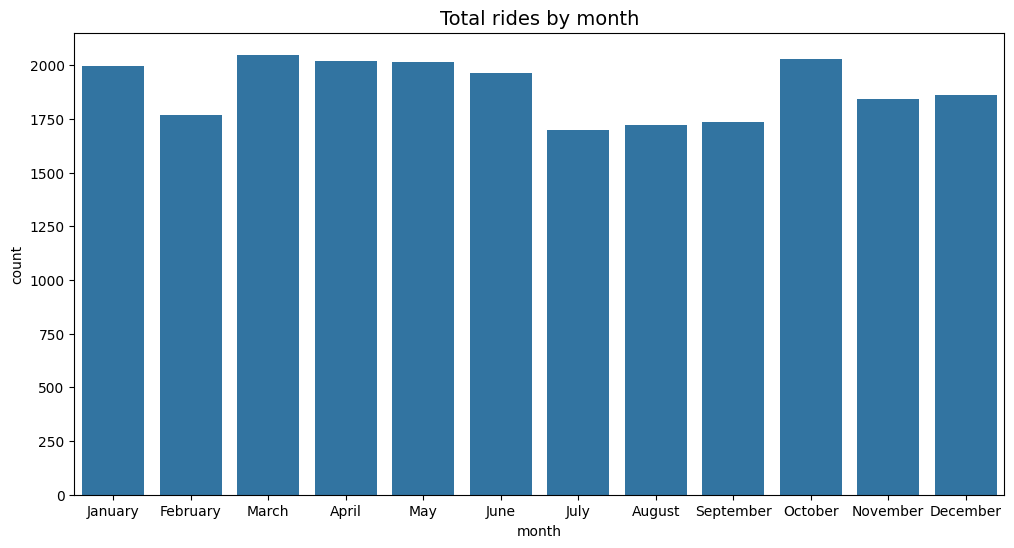

In [33]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='count', data=rides_by_month)
ax.set_xticklabels(month_list)
plt.title('Total rides by month', fontsize=14)

### **Plot total ride by day**

In [34]:
# Repeat the above process, this time for rides by day
rides_by_day = data['day'].value_counts()
rides_by_day

,count
day,
Friday,3413
Thursday,3402
Wednesday,3390
Saturday,3367
Tuesday,3197
Sunday,2998
Monday,2931


In [35]:
day_list = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
rides_by_day = rides_by_day.reindex(day_list).reset_index()
rides_by_day

,day,count
0,Sunday,2998
1,Monday,2931
2,Tuesday,3197
3,Wednesday,3390
4,Thursday,3402
5,Friday,3413
6,Saturday,3367


<ipython-input-36-26f88b9b21cc>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_list)


Text(0.5, 1.0, 'Total rides by month')

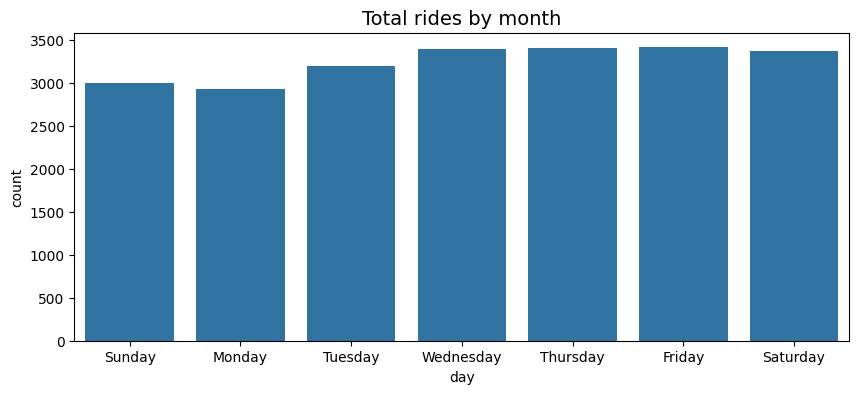

In [36]:
# Create a bar plot of total rides per month
plt.figure(figsize=(10,4))
ax = sns.barplot(x='day', y='count', data=rides_by_day)
ax.set_xticklabels(day_list)
plt.title('Total rides by month', fontsize=14)

### **Plot total revenue by day of the week**

In [37]:
revenue_by_day = data.groupby('day')['total_amount'].sum().reindex(day_list).reset_index()
revenue_by_day

,day,total_amount
0,Sunday,48624.06
1,Monday,49574.37
2,Tuesday,52449.14
3,Wednesday,55310.47
4,Thursday,57181.91
5,Friday,55818.74
6,Saturday,51195.40


<ipython-input-38-0ac202820f47>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(day_list)


Text(0.5, 1.0, 'Total amount by day of the week')

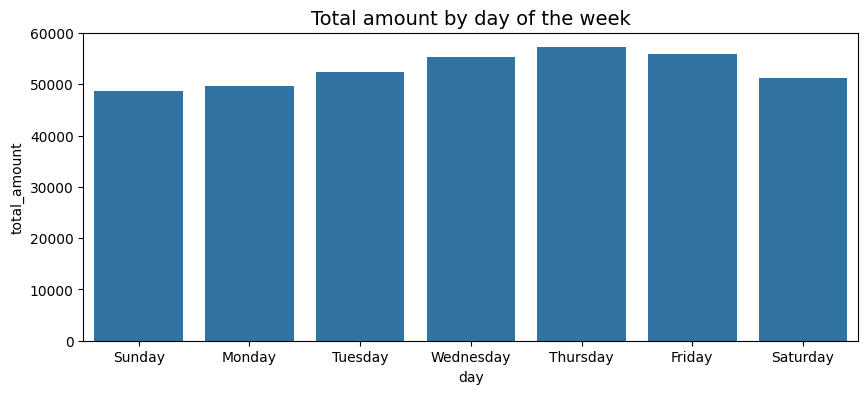

In [38]:
# Create bar plot of total revenue by day

plt.figure(figsize=(10,4))
ax = sns.barplot(x='day', y='total_amount', data=revenue_by_day)
ax.set_xticklabels(day_list)
plt.title('Total amount by day of the week', fontsize=14)

### **Plot total revenue by month**

In [39]:
revenue_by_month = data.groupby('month')['total_amount'].sum().reindex(month_list).reset_index()
revenue_by_month

,month,total_amount
0,January,31735.25
1,February,28937.89
2,March,33085.89
3,April,31934.54
4,May,33828.58
5,June,32920.52
6,July,26617.64
7,August,27759.56
8,September,28206.38
9,October,33065.83


<ipython-input-40-df9bd70736d9>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(month_list)


Text(0.5, 1.0, 'Total amount by month')

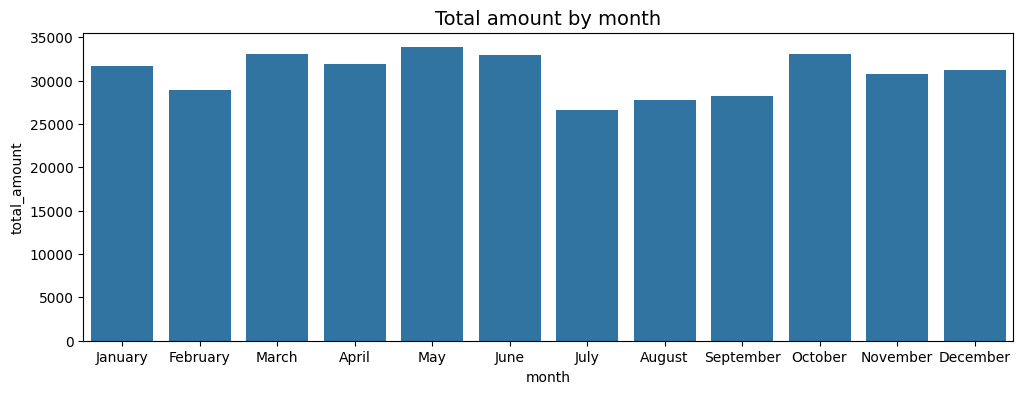

In [40]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,4))
ax = sns.barplot(x='month', y='total_amount', data=revenue_by_month)
ax.set_xticklabels(month_list)
plt.title('Total amount by month', fontsize=14)

### **Plot mean trip distance by drop-off location**

In [41]:
data.DOLocationID.value_counts()

,count
DOLocationID,
161,858
236,802
230,761
237,759
170,699
...,...
219,1
18,1
31,1


In [42]:
# Calculate the mean trip distance for each drop-off location
data_mtd = data.groupby('DOLocationID').mean(numeric_only=True)[['trip_distance']]

# Sort the results in descending order by mean trip distance
data_mtd.sort_values('trip_distance')

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


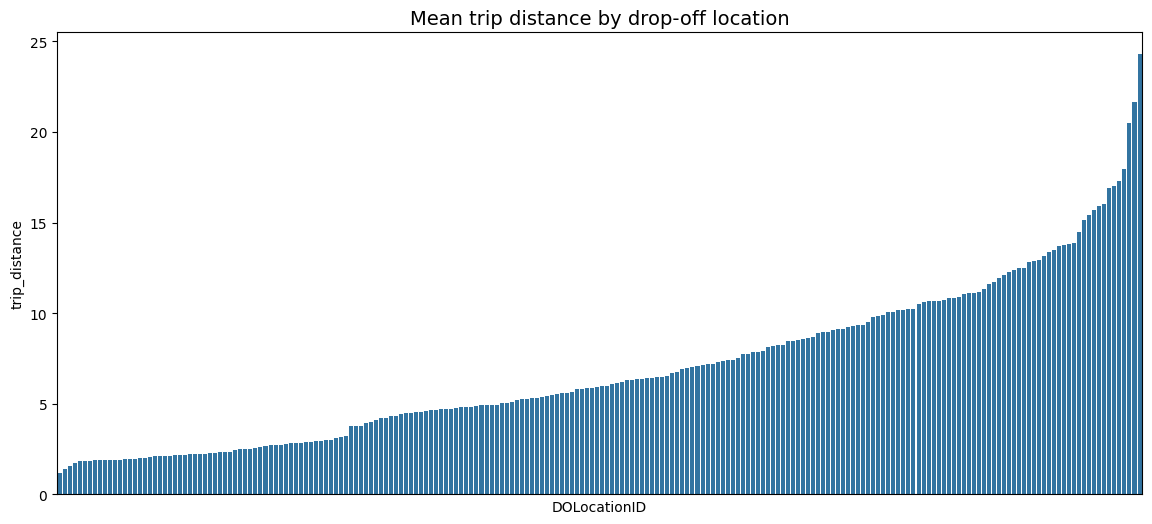

In [43]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
data_mtd = data_mtd.sort_values(by='trip_distance')
ax = sns.barplot(x=data_mtd.index,
                 y=data_mtd['trip_distance'],
                 order=data_mtd.index)

ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=14);

### **Histogram of rides by drop-off location**

In [44]:
# Check if all drop-off locations are consecutively numbered
data.DOLocationID.sort_values().unique()


array([  1,   4,   7,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  21,  22,  23,  24,  25,  26,  28,  29,  31,  32,  33,  34,
        35,  36,  37,  38,  39,  40,  41,  42,  43,  45,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  97,  98, 100, 102, 106, 107, 112, 113, 114, 116,
       117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 157, 158, 159, 160, 161,
       162, 163, 164, 166, 168, 169, 170, 171, 173, 174, 175, 177, 178,
       179, 180, 181, 182, 183, 184, 186, 188, 189, 190, 192, 193, 194,
       195, 196, 197, 198, 200, 201, 202, 205, 207, 208, 209, 210, 211,
       212, 213, 215, 216, 217, 218, 219, 220, 222, 223, 224, 22

In [45]:
sorted_DOLocationID = data.DOLocationID.sort_values()
sorted_DOLocationID.astype('object').unique()

array([1, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24,
       25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
       83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 100, 102,
       106, 107, 112, 113, 114, 116, 117, 118, 119, 120, 121, 123, 124,
       125, 126, 127, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
       153, 157, 158, 159, 160, 161, 162, 163, 164, 166, 168, 169, 170,
       171, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 186,
       188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 200, 201, 202,
       205, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219,
       220, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242,

In [46]:
rides_by_DOL = data.DOLocationID.value_counts()

rides_by_DOL = rides_by_DOL.reindex(sorted_DOLocationID).reset_index()
rides_by_DOL


,DOLocationID,count
0,1,34
1,1,34
2,1,34
3,1,34
4,1,34
...,...,...
22693,265,60
22694,265,60
22695,265,60
22696,265,60


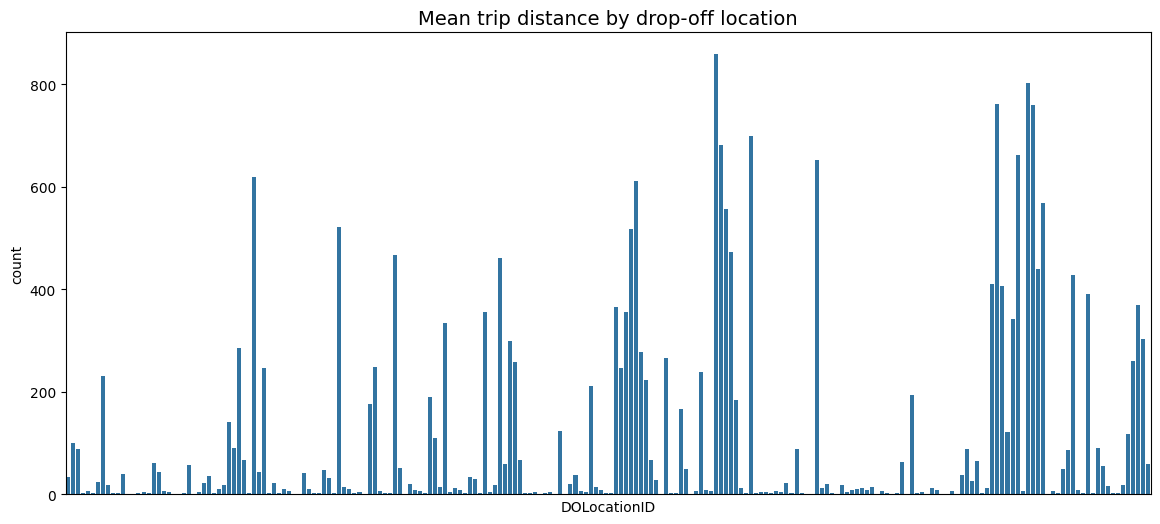

In [48]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(14,6))
ax = sns.barplot(x='DOLocationID',
                 y='count',
                 order=sorted_DOLocationID, data=rides_by_DOL)

ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=14);

El projecto continua en Automatidata_02.ipynb